In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 

In [3]:
solar_system_data = pd.read_csv("../course_assignments/homework9/solar_system.csv")

solar_system_data

,Attribute,Mercury,Venus,Earth,Moon,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
0,Mass (10^24kg),0.330,4.87,5.97,0.073,0.642,1898,568,86.8,102,0.0130
1,Diameter (km),4879,12104,12756,3475,6792,142984,120536,51118,49528,2376
2,Density (kg/m^3),5429,5243,5514,3340,3934,1326,687,1270,1638,1850
3,Gravity (m/s^2),3.7,8.9,9.8,1.6,3.7,23.1,9.0,8.7,11.0,0.7
4,Escape Velocity (km/s),4.3,10.4,11.2,2.4,5.0,59.5,35.5,21.3,23.5,1.3
5,Rotation Period (hours),1407.6,-5832.5,23.9,655.7,24.6,9.9,10.7,-17.2,16.1,-153.3
6,Length of Day (hours),4222.6,2802.0,24.0,708.7,24.7,9.9,10.7,17.2,16.1,153.3
7,Distance from Sun (10^6 km),57.9,108.2,149.6,0.384,228.0,778.5,1432.0,2867.0,4515.0,5906.4
8,Perihelion (10^6 km),46.0,107.5,147.1,0.363,206.7,740.6,1357.6,2732.7,4471.1,4436.8
9,Aphelion (10^6 km),69.8,108.9,152.1,0.406,249.3,816.4,1506.5,3001.4,4558.9,7375.9


In [33]:
orbital_period = solar_system_data.iloc[10, 1:].astype(float)
perihelion = solar_system_data.iloc[8, 1:].astype(float)
aphelion = solar_system_data.iloc[9, 1:].astype(float)


orbital_period

Mercury       88.0
Venus        224.7
Earth        365.2
Moon          27.3
Mars         687.0
Jupiter     4331.0
Saturn     10747.0
Uranus     30589.0
Neptune    59800.0
Pluto      90560.0
Name: 10, dtype: float64

In [63]:
semi_major_axis = (perihelion + aphelion) / 2

semi_major_axis_row = pd.DataFrame(semi_major_axis).T
semi_major_axis_row.insert(0, "Attribute", "Semi Major Axis (10^6 km)")

solar_system_df = pd.concat([solar_system_data, semi_major_axis_row], ignore_index=True)

solar_system_df


,Attribute,Mercury,Venus,Earth,Moon,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
0,Mass (10^24kg),0.330,4.87,5.97,0.073,0.642,1898,568,86.8,102,0.0130
1,Diameter (km),4879,12104,12756,3475,6792,142984,120536,51118,49528,2376
2,Density (kg/m^3),5429,5243,5514,3340,3934,1326,687,1270,1638,1850
3,Gravity (m/s^2),3.7,8.9,9.8,1.6,3.7,23.1,9.0,8.7,11.0,0.7
4,Escape Velocity (km/s),4.3,10.4,11.2,2.4,5.0,59.5,35.5,21.3,23.5,1.3
5,Rotation Period (hours),1407.6,-5832.5,23.9,655.7,24.6,9.9,10.7,-17.2,16.1,-153.3
6,Length of Day (hours),4222.6,2802.0,24.0,708.7,24.7,9.9,10.7,17.2,16.1,153.3
7,Distance from Sun (10^6 km),57.9,108.2,149.6,0.384,228.0,778.5,1432.0,2867.0,4515.0,5906.4
8,Perihelion (10^6 km),46.0,107.5,147.1,0.363,206.7,740.6,1357.6,2732.7,4471.1,4436.8
9,Aphelion (10^6 km),69.8,108.9,152.1,0.406,249.3,816.4,1506.5,3001.4,4558.9,7375.9


/var/folders/ym/rxtbz45d1j5gqcrl34p7b42h0000gn/T/ipykernel_60524/548943134.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


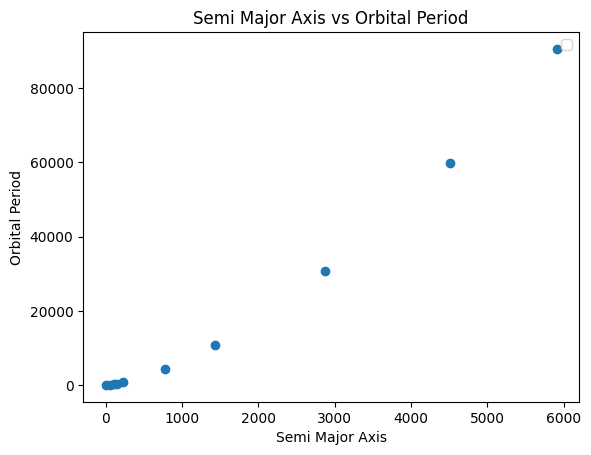

In [88]:
plt.scatter(semi_major_axis, orbital_period)

# Labels and title
plt.xlabel("Semi Major Axis")
plt.ylabel("Orbital Period")
plt.title("Semi Major Axis vs Orbital Period")

# Legend
plt.legend()

plt.show()

In [65]:
def keplers_third_law(a, m):
    return m * a ** 1.5

In [ ]:
semi_major_axis = solar_system_df.iloc[20, 1:].astype(float)

Mercury      57.9000
Venus       108.2000
Earth       149.6000
Moon          0.3845
Mars        228.0000
Jupiter     778.5000
Saturn     1432.0500
Uranus     2867.0500
Neptune    4515.0000
Pluto      5906.3500
Name: 20, dtype: float64

Best-fit m = [0.19879982]


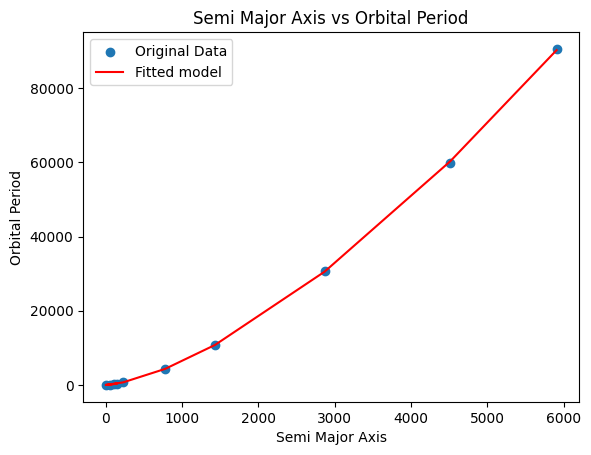

In [97]:
p0 = [1,1]
x = semi_major_axis
y = orbital_period
popt, pcov = curve_fit(keplers_third_law, x, y)

m_fit = popt
y_fit = keplers_third_law(x, m_fit)

plt.scatter(x, y, label="Original Data")
plt.plot(x, y_fit, color="red", label="Fitted model")

# Labels and title
plt.xlabel("Semi Major Axis")
plt.ylabel("Orbital Period")
plt.title("Semi Major Axis vs Orbital Period")

print("Best-fit m =", m_fit)

# Legend
plt.legend()

plt.show()

In [99]:
residuals = y - keplers_third_law(x, m_fit)
chi2 = np.sum(residuals**2)
dof = len(x) - len(popt)
chi2_reduced = chi2 / dof

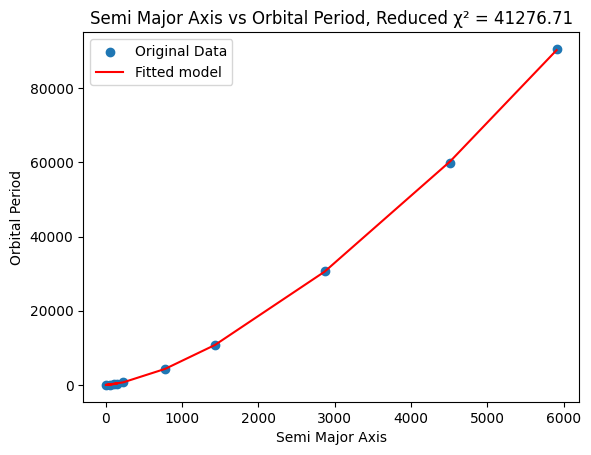

In [100]:
plt.scatter(x, y, label="Original Data")
plt.plot(x, y_fit, color="red", label="Fitted model")

# Labels and title
plt.xlabel("Semi Major Axis")
plt.ylabel("Orbital Period")
plt.title(f"Semi Major Axis vs Orbital Period, Reduced χ² = {chi2_reduced:.2f}")

# Legend
plt.legend()

plt.show()

In [102]:
solar_system_df.to_csv("kepler.csv", index=False)